In [19]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

from functools import partial
from datetime import datetime

pd.set_option('display.float_format', '{:.2f}'.format)

In [20]:
df = pd.read_csv('train.csv')

In [21]:
# Creamos el dataframe y le asignamos como id del dataframe, el id de cada row del csv.
df = pd.read_csv('train.csv', index_col='id')

In [22]:
# elimino features que no usaremos en el analisis del data set
# trabajando con un data set grande esto me ocuparia menos espacio en memoria y disco.
del df['titulo']
del df['descripcion']
del df['direccion']

In [23]:
#listo los datos faltantes
df_nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
df_nulls = df_nulls[df_nulls.nulls > 0]
df_nulls['porcentaje'] = round(100*df_nulls['nulls'] / len(df), 2)
df_nulls['porcentaje_nonull'] = 100 - df_nulls.porcentaje
del df_nulls['nulls']

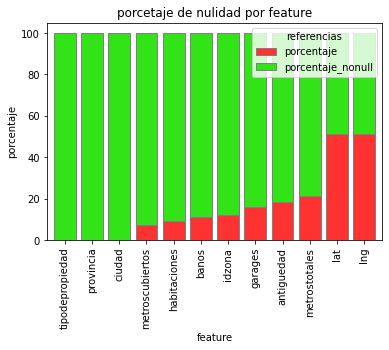

In [24]:
red = '#ff3232'; green = '#32E317'
df_nulls.plot.bar(stacked=True, color=[red, green], width= 0.8, edgecolor='grey', rot=90)
plt.title('porcetaje de nulidad por feature')
plt.xlabel('feature')
plt.ylabel('porcentaje')
plt.legend(['null', 'no null'])
plt.legend(title='referencias')
#plt.yscale('linear') #default == linear
#plt.ylim(0,100) por default el upper bound es el valor maximo de la feature
#plt.grid(False)#default == false
plt.show()

#https://stackoverflow.com/questions/43544694/using-pandas-crosstab-with-seaborn-stacked-barplots?noredirect=1&lq=1
#https://python-graph-gallery.com/13-percent-stacked-barplot/


In [25]:
# varias features tienen un porcentaje considerable de nulidad,
# entonces mas adelante cuando haga un analisis se tendra que tomar 1 de 2 caminos:
#
# 1) eliminar los registros con NaN.
# 2) elegir una estrategia para completar los valores perdidos.
#
# Notar que no se analizo si la nulidad de lat y lng esta distribuida en partes iguales 
# o es para una ciudad o prov especifica

In [26]:
#normalizo tipodepropiedad, direccion, ciudad y provincia a lowercase
def convert_to_lower(df, feature):
    df[feature] = df[feature].str.lower()

convert_to_lower(df, 'tipodepropiedad')
convert_to_lower(df, 'ciudad')
convert_to_lower(df, 'provincia')

In [27]:
#valido que habitaciones, garages, banos sean valores enteros

def is_integer(number):
    frac, _ = math.modf(number)
    return frac == 0

def drop_nan_from_arr(arr):
    return [x for x in arr if ~np.isnan(x)]

def apply_all(arr, function):
    return all([function(x) for x in arr])

unique_habitaciones = df.habitaciones.unique()
unique_habitaciones = drop_nan_from_arr(unique_habitaciones)
print("unique_habitaciones:", apply_all(unique_habitaciones, is_integer))

unique_garages = df.garages.unique()
unique_garages = drop_nan_from_arr(unique_garages)
print("unique_garages:", apply_all(unique_garages, is_integer))

unique_banos = df.banos.unique()
unique_banos = drop_nan_from_arr(unique_banos)
print("unique_banos:", apply_all(unique_banos, is_integer))

unique_habitaciones: True
unique_garages: True
unique_banos: True


In [28]:
#'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas','centroscomercialescercanos'
# parecen ser booleanos por ser siempre 0 Y 1 y por la naturaleza del feature.
# Analizo si es acertada la suposicion, de serlo, los convierto en Boolean, van a ocupar menos espacio.

def is_boolean(x):
    return x == 0 or x == 1

def int_to_bool(x):
    return x != 0

unique_gimnasio = df.gimnasio.unique()
unique_gimnasio = drop_nan_from_arr(unique_gimnasio)
print("unique_gimnasio is_boolean:", apply_all(unique_gimnasio, is_boolean))
df.gimnasio = df.gimnasio == True

unique_usosmultiples = df.usosmultiples.unique()
unique_usosmultiples = drop_nan_from_arr(unique_usosmultiples)
print("unique_usosmultiples is_boolean:", apply_all(unique_usosmultiples, is_boolean))
df.usosmultiples = df.usosmultiples == True

unique_piscina = df.piscina.unique()
unique_piscina = drop_nan_from_arr(unique_piscina)
print("unique_piscina is_boolean:", apply_all(unique_piscina, is_boolean))
df.piscina = df.piscina == True

unique_escuelascercanas = df.escuelascercanas.unique()
unique_escuelascercanas = drop_nan_from_arr(unique_escuelascercanas)
print("unique_escuelascercanas is_boolean:", apply_all(unique_escuelascercanas, is_boolean))
df.escuelascercanas = df.escuelascercanas == True

unique_centroscomercialescercanos = df.centroscomercialescercanos.unique()
unique_centroscomercialescercanos = drop_nan_from_arr(unique_centroscomercialescercanos)
print("unique_centroscomercialescercanos is_boolean:", apply_all(unique_centroscomercialescercanos, is_boolean))
df.centroscomercialescercanos = df.centroscomercialescercanos == True

unique_gimnasio is_boolean: True
unique_usosmultiples is_boolean: True
unique_piscina is_boolean: True
unique_escuelascercanas is_boolean: True
unique_centroscomercialescercanos is_boolean: True


In [29]:
# VALIDO QUE TODAS LAS FECHAS DE LA FEATURE 'fecha' ESTEN ENTRE 2012 Y 2016

def date_between(date1, date2, date_to_compare):
    return date1 < date_to_compare and date_to_compare < date2

#aplicacion parcial de 'date_between(date1, date2, date_to_compare)'
partial_date_between = partial(date_between,'2012-00-00 00:00:00', '2017-00-00 00:00:00')
apply_all(df.fecha, partial_date_between)

# otra forma de hacer esta validacion seria usando el tipo de dato datetime, 
# probablemente mas performante tambien. Seria hacer algo como:
# df['fecha'] = df['fecha'].apply(func = (lambda x :(datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
# luego la funcion date_between(...) hara algo como: 
# return 2012 < date_to_compare.year and date_to_compare.year < 2017

True

In [30]:
#valido no tener precios negativos
df[df.precio > 0].size == df.size

True

In [31]:
#guardo dataset transformado
df.to_csv('train_transformed.csv')